# Online Shoppers Classification

In the fast-paced and ever-evolving world of e-commerce, businesses are constantly seeking innovative ways to stay ahead of the competition and meet the growing demands of online shoppers. One of the most critical aspects of achieving this is understanding and predicting customer behavior. With millions of visitors browsing online stores every day, the ability to accurately forecast which of these visitors will make a purchase can provide a significant competitive advantage.

This project focuses on the application of  machine learning techniques to predict online shopping purchasing intentions. By analyzing a rich dataset of user interactions from an e-commerce website, I aim to uncover patterns and insights that can help businesses tailor their marketing strategies, optimize their operations, and enhance the overall customer experience.

The implications of accurately classifying purchasing intentions are profound. For customers likely to make a purchase, businesses can offer personalized recommendations, targeted discounts, and enhanced support to facilitate the buying process. For those less likely to convert, strategies such as re-engagement campaigns and feedback collection can be employed to understand their hesitations and improve future interactions.

Ultimately, this project seeks to transform how businesses approach online retail, driving higher conversion rates, better resource allocation, and more informed strategic planning. By leveraging data-driven insights, companies can not only boost their immediate sales but also build long-term customer loyalty and achieve sustainable growth in a highly competitive market.

## Data 

The dataset used in this project is the "Online Shoppers Purchasing Intention Dataset," sourced from the UCI Machine Learning Repository. This dataset provides a comprehensive view of online shopping behavior, containing a variety of features that capture the nuances of how visitors interact with an e-commerce website.

Link to Dataset: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

The dataset consists of 12,330 instances and 18 features, along with a target variable (Revenue) that indicates whether a purchase was made during a session. Here are the key features:

1. Administrative: Number of administrative pages visited.
2. Administrative Duration: Total time spent on administrative pages.
3. Informational: Number of informational pages visited.
4. Informational Duration: Total time spent on informational pages.
5. ProductRelated: Number of product-related pages visited.
6. ProductRelated Duration: Total time spent on product-related pages.
7. BounceRates: Percentage of visitors who left the site after viewing only one page.
8. ExitRates: Percentage of exits from the site.
9. PageValues: Average value for a web page a user visited before completing an e-commerce transaction.
10. SpecialDay: Closeness of the visit to a special day (e.g., Valentine's Day).
11. Month: Month of the year.
12. OperatingSystems: Operating system used by the visitor.
13. Browser: Browser used by the visitor.
14. Region: Geographical region of the visitor.
15. TrafficType: Type of traffic source.
16. VisitorType: New or returning visitor.
17. Weekend: Whether the visit occurred on a weekend.
18. Revenue: Target variable indicating if a purchase was made (True/False).

Each session belong to a different visitor in a 1-year period


## Data Preprocessing

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

In [2]:
#importing the data 
path = r'C:\Users\irene\Documents\project\Online Visitor Classification\online_shoppers_intention.csv'

df = pd.read_csv(path)

df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


So total variables/columns are 18 while there are 12330 number of observations (online visitors)

In [3]:
# number of column
df.shape[1] # 

18

In [4]:
# number of rows 
df.shape[0]

12330

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Missing Values

Based on the UCI website, there is no missing values. However to be sure, let's check if there is any missing values 

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing values on each variables!

### Categorical Variables


In [7]:
unique_values = {}

for col in ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']:
    unique_values[col] = df[col].unique()

unique_values

#unique_values = 
#df['Month'].unique()

{'Month': array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object),
 'OperatingSystems': array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64),
 'Browser': array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64),
 'Region': array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 'TrafficType': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
        16, 17, 20], dtype=int64),
 'VisitorType': array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 'Weekend': array([False,  True]),
 'Revenue': array([False,  True])}

## Exploratory Data Analysis 

### Data distribution 


Out of 12,330 visitors on the website only 15.5% (1908) of them who end up purchasing while the rest did not.

In [8]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

Here's the Distribution plot

C:\Users\irene\AppData\Local\Temp\ipykernel_9092\3630308839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Revenue', data = df, palette = ['yellow', 'purple'])


Text(0.5, 1.0, 'Distribution of Visitors who Purchased')

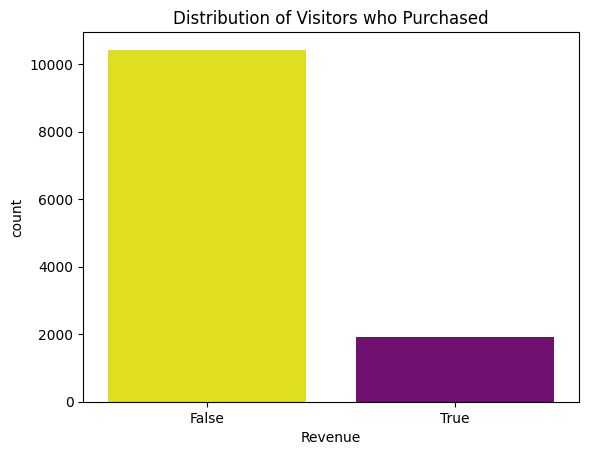

In [9]:
sns.countplot(x = 'Revenue', data = df, palette = ['yellow', 'purple'])
plt.title('Distribution of Visitors who Purchased')


### Data Visualization for Numerical Variables

The dataset consists of 10 numerical features, let's visualize them with scatterplot matrix

In [11]:
cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Page']

### Encoding Class Labels 

To enable the machine learning algorithms to operate effectively, I will begin by applying one-hot encoding to the categorical target variable, Revenue.

1 means visitors who purchased, while 0 means did not purchase

In [11]:
# One Hot Encoding for Revenue
class_le = LabelEncoder()
df['Revenue'] = class_le.fit_transform(df['Revenue'].values)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,0


Afterwards, I proceeded with one-hot encoding for all categorical variables, which expanded the feature set to a total of 69 variables/features.

In [12]:
#specifying column to be transformed
categorical_columns = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

#perform one hot encoding 
df_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first= True)

df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,True,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False


### Splitting the dataset into test and training data 

The dataset was split into training and testing sets using a 75% training-to-25% testing ratio, and subsequently standardized.

In [13]:
# splitting the data into train and test 
X = df_encoded.drop('Revenue', axis= 1) 
y = df_encoded['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)


# Standardizing 
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

As the dataset is highly imbalanced (with a significant majority of people not purchasing compared to those who did), let's apply SMOTE to the minority class and train the machine learning algorithms, in addition to training using the original data.

SMOTE (Synthetic Minority Over-sampling Technique) is used to address the issue of class imbalance in machine learning datasets. It works by generating synthetic examples of the minority class (less frequently occurring class) to achieve a more balanced distribution between classes.

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

Furthermore, to make sure that the algorithm trains well, I checked the proportion of visitors who made purchases in both train and test dataset

In [15]:
sum(y_train)/len(y_train)

0.15345517465123823

In [16]:
sum(y_test)/len(y_test)

0.1586117418099254

The proportions are equal! Let's continue to the next step 

## Building Baseline Model 
Let's first started by building logistic regression, as it is the on of the simplest model for binary classification

In [17]:
lr = LogisticRegression(random_state= 42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [30]:
#deriving probability prediction
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1] #pull the positive prob

#predicted labels 
y_pred_lr = lr.predict(X_test_scaled)

#calculating roc-auc score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

#calculating the average precision
f1_score_lr = f1_score(y_test, y_pred_lr)

#calculating the accuracy score 
acc_lr = accuracy_score(y_test,y_pred_lr)

#calculating 
print(f'Logistic Regression ROC-AUC: {roc_auc_lr}')
print(f'Logistic Regression f1_score: {f1_score_lr}')
print(f'Logistuc Regression Accuracy: {acc_lr}')

Logistic Regression ROC-AUC: 0.8851770563814876
Logistic Regression f1_score: 0.47448275862068967
Logistuc Regression Accuracy: 0.876419072332144


The ROC-AUC score and accuracy is good, however the f1-score is low (below 0.5 treshold). This usually happened because our data is highly imbalanced, which means that high ROC-AUC score be achieved even if the model is biased towards the majority class. So, in this project we will focus more on f1 score, as the F1 score is more useful for evaluating imbalanced data because it balances the trade-off between precision and recall. 

Let's see the confusion matrix:

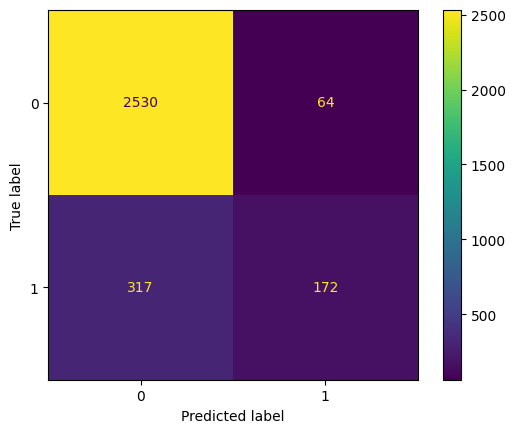

In [83]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test)

From the confusion matrix above, we can see that our model correctly identified 35% of the online visitors who made purchases (i.e., recall for the positive class is 35%). In a business scenario, this could be problematic due to the cost of missing out on potential purchases. Therefore, let's try to optimize the True Positive rate (recall) while also maintaining a balance between precision and recall.

In [84]:
# Hyperparameter Tuning

param_grid = [
    {'C': [0.001, 0.01, 0.1, 0.5, 1, 10 , 100], #C Values must be > 0 
     'penalty': ['l2']
     }
]

optimal_params = GridSearchCV(
    LogisticRegression(), 
    param_grid, 
    cv = 5, 
    scoring = 'f1'
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'penalty': 'l2'}


This is the default for the logistic regression in scikit learn. Let's try other method which is SMOTE to train our model based on the syntethic values to handle class imbalance

#### Logistic Regression with SMOTE 

Let's see if training model with SMOTE can improve model performance

In [20]:
lr_resampled = LogisticRegression(random_state= 42)
lr_resampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [21]:
#deriving probability prediction
y_prob_lr_resampled = lr_resampled.predict_proba(X_test_scaled)[:,1] #pull the positive prob

#deriving class prediction
y_pred_lr_resampled = lr_resampled.predict(X_test_scaled)

#calculating roc-auc score
roc_auc_lr_resampled = roc_auc_score(y_test, y_prob_lr_resampled)

#calculating f1 score
f1_score_lr_resampled = f1_score(y_test, y_pred_lr_resampled)

#calculating the accuracy
acc_score_lr_resampled = accuracy_score(y_test, y_pred_lr_resampled)

#calculating 
print(f'Logistic Regression ROC-AUC SMOTE: {roc_auc_lr_resampled}')
print(f'Logistic Regression f1_score SMOTE: {f1_score_lr_resampled}')
print(f'Logistic Regression acc_score SMOTE: {acc_score_lr_resampled}')



Logistic Regression ROC-AUC SMOTE: 0.8927547131732345
Logistic Regression f1_score SMOTE: 0.6223358908780904
Logistic Regression acc_score SMOTE: 0.8563087901394746


Training the model with SMOTE dataset, improve the accuracy, f1 and ROC scores! let's see the confusion matrix! 

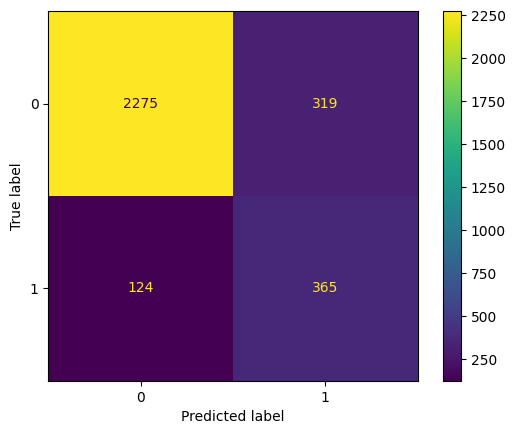

In [80]:
ConfusionMatrixDisplay.from_estimator(lr_resampled, X_test_scaled, y_test)

There's an improvement on true positive rate/recall! However there is also trade off, as the recall increases, the number of false positive (precision) also decrease. 

In [21]:
# Hyperparameter tuning

param_grid = [
    {'C': [0.001, 0.01, 0.1, 0.5, 1, 10 , 100], #C Values must be > 0 
     'penalty': ['l2']
     }
]

optimal_params = GridSearchCV(
    LogisticRegression(), 
    param_grid, 
    cv = 5, 
    scoring = 'f1'
)

optimal_params.fit(X_train_resampled, y_train_resampled)
print(optimal_params.best_params_)

{'C': 1, 'penalty': 'l2'}


### Logistic Regression with SMOTE and Adjusting Treshold

The optimal parameters also the default parameters for logistic regression, so there is no need to re-treain our model. Let's try to adjust the treshold to optimize f1 score :

#### Best Treshold

In [22]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_prob_lr_resampled)

In [23]:
import numpy as np

f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
best_threshold_lr = thresholds_lr[np.argmax(f1_scores_lr)]
best_f1_score_lr = f1_scores_lr[np.argmax(f1_scores_lr)]
print('Best Threshold:', best_threshold_lr)
print('Best F1 Score:', best_f1_score_lr)

Best Threshold: 0.6118017866503983
Best F1 Score: 0.6468842729970327


So if we change our treshold to 0.62 it will improve the f1 score to 0.65

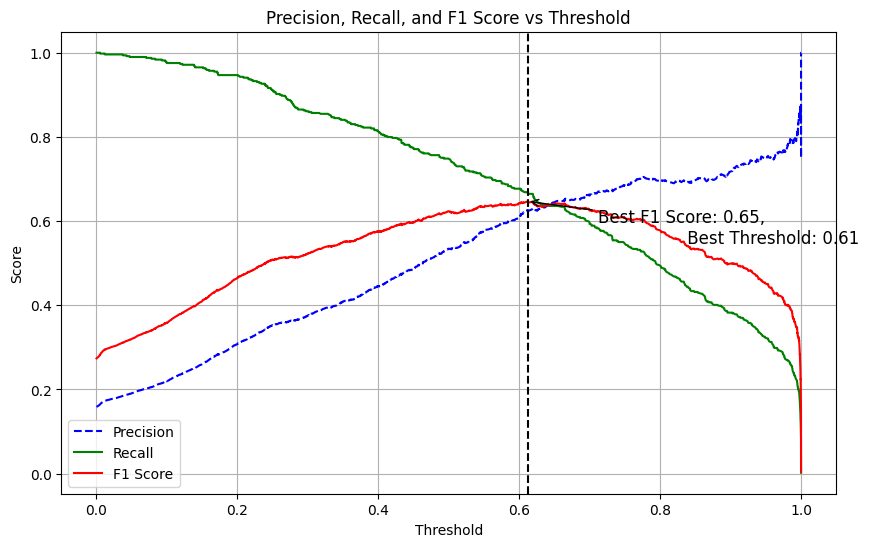

In [27]:
# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_lr, precision_lr[:-1], "b--", label="Precision")
plt.plot(thresholds_lr, recall_lr[:-1], "g-", label="Recall")
plt.plot(thresholds_lr, f1_scores_lr[:-1], "r-", label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend(loc="best")
plt.grid(True)

# Add a vertical line for the best threshold
plt.axvline(x=best_threshold_lr, color='k', linestyle='--', label=f'Best Threshold ({best_threshold_lr:.2f})')

# Annotate the best F1 score
plt.annotate(f'''Best F1 Score: {best_f1_score_lr:.2f},
                 Best Threshold: {best_threshold_lr:.2f}''',
             xy=(best_threshold_lr, best_f1_score_lr),
             xytext=(best_threshold_lr + 0.1, best_f1_score_lr - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             color='black')

plt.show()

On the plot we can see that the highest f1 score is when the treshold is 0.61.

In [31]:
y_pred_new_lr = (y_prob_lr_resampled >= best_threshold_lr).astype(int)

f1_score_new_lr = f1_score(y_test, y_pred_new_lr)
acc_score_new_lr = accuracy_score(y_test, y_pred_new_lr)

print(f'Logistic Regression ROC-AUC SMOTE: {roc_auc_lr_resampled}')
print(f'Logistic Regression f1_score SMOTE: {f1_score_new_lr}')
print(f'Logistic Regression acc_score SMOTE: {acc_score_new_lr}')

Logistic Regression ROC-AUC SMOTE: 0.8927547131732345
Logistic Regression f1_score SMOTE: 0.6468842729970327
Logistic Regression acc_score SMOTE: 0.8842036976970483


## Building Support Vector Machine 

Next, let's try to build SVM.

In [28]:
from sklearn.svm import SVC

# fitting the support vector machine
svm = SVC(random_state=42, probability= True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [29]:
from sklearn.metrics import precision_recall_fscore_support

#deriving probability prediction
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

y_pred_svm = svm.predict(X_test_scaled)

#calculating rocs-auc score 
roc_auc_svm = roc_auc_score(y_test,y_prob_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
acc_score_svm = accuracy_score(y_test, y_pred_svm)


print(f'ROC AUC SVM score: {roc_auc_svm}')
print(f'F1 SVM Score: {f1_score_svm}')
print(f'Accuracy Score: {acc_score_svm}')

ROC AUC SVM score: 0.8681561035140082
F1 SVM Score: 0.49247606019151846
Accuracy Score: 0.8796626662341874


The accuracy and ROC-AUC scores are pretty good while F1 score isn't

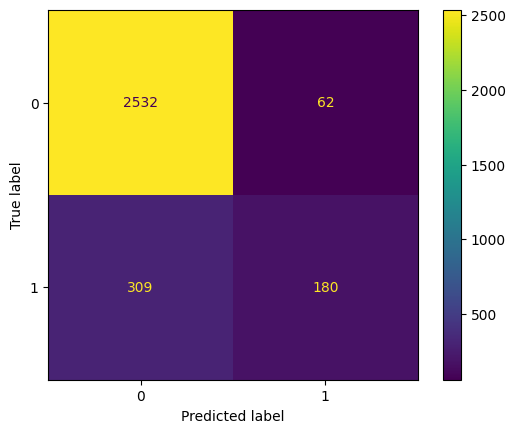

In [66]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test)

From the confusion matrix we can see that SVM correctly identified 37% of the users who made purchases, slightly higher than the first logistic regression. Next, we tuned the model.

In [ ]:
#param_grid = [
    #{'C': [0.001, 0.01, 0.1, 0.5, 1, 10 , 100], #C Values must be > 0 
     #'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     #'kernel': ['rbf']}
#]

#optimal_params = GridSearchCV(
    #SVC(), 
    #param_grid, 
    #cv = 5, 
    #scoring = 'f1'
#)

#optimal_params.fit(X_train_scaled, y_train)
#print(optimal_params.best_params_)

#the output is C = 10, gamma = 0.01

In [32]:
#refitting the algorithm 
svm = SVC(random_state= 42, C = 10, gamma = 0.01,probability= True)
svm_opt = svm.fit(X_train_scaled, y_train)

y_prob_svm_opt = svm_opt.predict_proba(X_test_scaled)[:,1]

y_pred_svm_opt = svm_opt.predict(X_test_scaled)

#roc_auc 

roc_auc_svm_opt = roc_auc_score(y_test, y_prob_svm_opt)
f1_score_svm_opt = f1_score(y_test, y_pred_svm_opt)
acc_score_svm = accuracy_score(y_test, y_pred_svm_opt)


print(f'ROC AUC score: {roc_auc_svm_opt}')
print(f'f1 Score: {f1_score_svm_opt}')
print(f'acc Score: {acc_score_svm}')

ROC AUC score: 0.8585764222296854
f1 Score: 0.5452292441140025
acc Score: 0.8809601037950049


There's a slight improvement on 

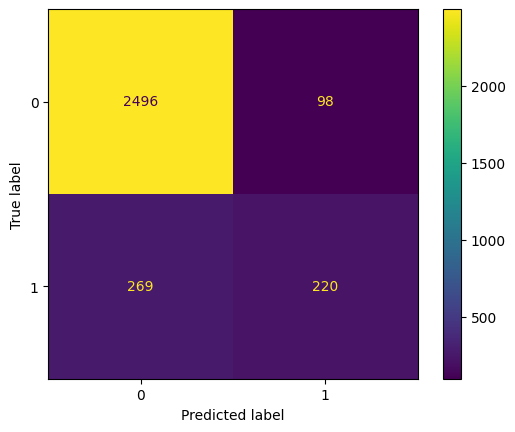

In [69]:
ConfusionMatrixDisplay.from_estimator(svm_opt, X_test_scaled, y_test)

let's try to train our model using stemo!

In [32]:
#refitting the algorithm 
svm = SVC(random_state=42, probability= True)
svm_smote = svm.fit(X_train_resampled, y_train_resampled)

In [33]:
y_prob_svm_smote = svm_smote.predict_proba(X_test_scaled)[:,1]

y_pred_svm_smote = svm_smote.predict(X_test_scaled)


#roc_auc 

roc_auc_svm_smote = roc_auc_score(y_test, y_prob_svm_smote)
f1_score_svm_smote = f1_score(y_test, y_pred_svm_smote)
acc_score_svm_smote = accuracy_score(y_test, y_pred_svm_smote)


print(f'ROC AUC score: {roc_auc_svm_smote}')
print(f'F1 Score: {f1_score_svm_smote}')
print(f'Accuracy Score: {acc_score_svm_smote}')


ROC AUC score: 0.8738728511446109
F1 Score: 0.6056210335448776
Accuracy Score: 0.8589036652611093


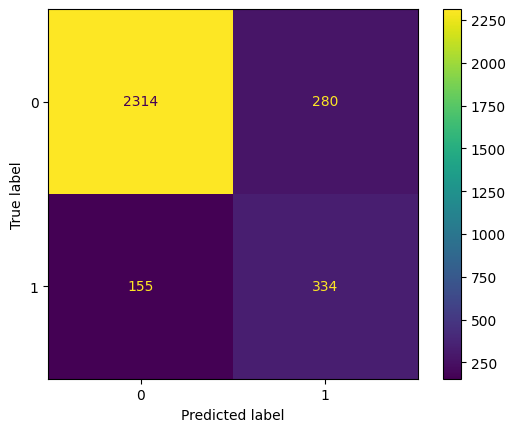

In [37]:
ConfusionMatrixDisplay.from_estimator(svm_smote, X_test_scaled, y_test)

In [72]:
param_grid = [{'C': [0.5, 1, 10, 100], #C neet to be > 0 
              'gamma': ['scale', 1, 0, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
              ]

optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv = 5, 
    scoring = 'f1',
    verbose= 0
)

optimal_params.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='f1')

In [102]:
#second round

param_grid = [{'C': [100], #C neet to be > 0 
              'gamma': ['scale', 1e-5, 1e-6, ], 
              'kernel': ['rbf']}
              ]

optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv = 10, 
    scoring = 'roc_auc',
    verbose= 0
)

optimal_params.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [100], 'gamma': ['scale', 1e-05],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

In [105]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [42]:
#refitting the algorithm 
svm = SVC(random_state=42, probability= True, C = 100, gamma= 'scale', kernel = 'rbf')


In [43]:
svm_smote_opt = svm.fit(X_train_resampled, y_train_resampled)

y_prob_svm_smote_opt = svm_smote_opt.predict_proba(X_test_scaled)[:,1]

y_pred_svm_smote_opt = svm_smote_opt.predict(X_test_scaled)


#roc_auc 
roc_auc_svm_smote_opt = roc_auc_score(y_test, y_prob_svm_smote_opt)
f1_score_svm_smote_opt = f1_score(y_test, y_pred_svm_smote_opt)
acc_score_svm_smote_opt = accuracy_score(y_test, y_pred_svm_smote_opt)


print(f'ROC AUC score: {roc_auc_svm_smote_opt}')
print(f'F1 Score: {f1_score_svm_smote_opt}')
print(f'Accuracy Score: {acc_score_svm_smote_opt}')

ROC AUC score: 0.8138621768340658
F1 Score: 0.5224489795918368
Accuracy Score: 0.8481998053843659


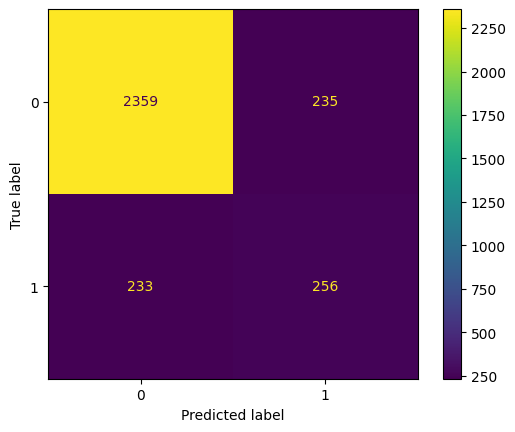

In [101]:
ConfusionMatrixDisplay.from_estimator(svm_smote_opt, X_test_scaled, y_test)

not improving, so let's try to adjust the treshold, and using the previous model

#### Best Treshold

In [95]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_prob_svm_smote)

f1_scores_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
best_threshold_svm = thresholds_svm[np.argmax(f1_scores_svm)]
best_f1_score_svm = f1_scores_svm[np.argmax(f1_scores_svm)]
print('Best Threshold:', best_threshold_svm)
print('Best F1 Score:', best_f1_score_svm)

Best Threshold: 0.44788295309037
Best F1 Score: 0.6133093525179856


In [49]:
y_pred_new_svm_tres = (y_prob_svm_smote >= best_threshold_svm).astype(int)

f1_score_svm_new = f1_score(y_test, y_pred_new_svm_tres)
acc_score_svm_new = accuracy_score(y_test, y_pred_new_svm_tres)

print(f'Linear Regression ROC-AUC SMOTE: {roc_auc_svm_smote}')
print(f'Linear Regression f1_score SMOTE: {f1_score_svm_new}')
print(f'Linear Regression acc_score SMOTE: {acc_score_svm_new}')


Linear Regression ROC-AUC SMOTE: 0.8738728511446109
Linear Regression f1_score SMOTE: 0.6133093525179856
Linear Regression acc_score SMOTE: 0.860525462212131


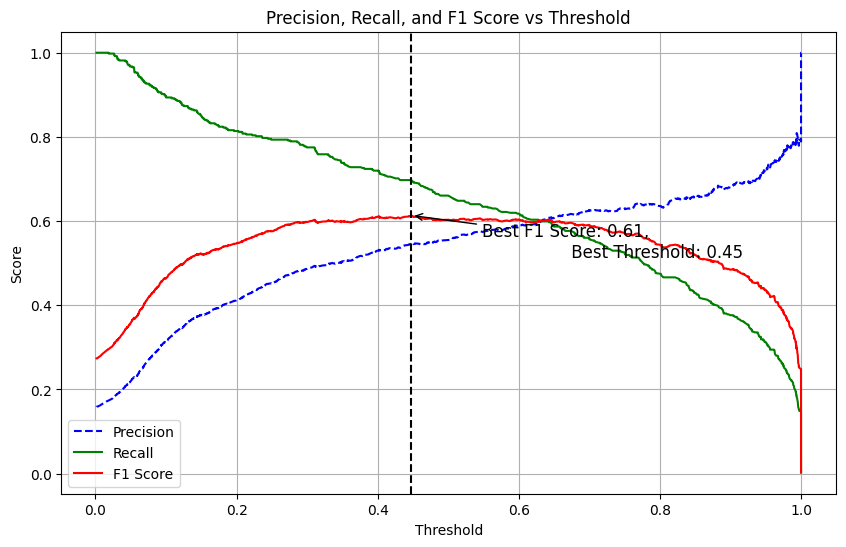

In [47]:
# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend(loc="best")
plt.grid(True)

# Add a vertical line for the best threshold
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Best Threshold ({best_threshold:.2f})')

# Annotate the best F1 score
plt.annotate(f'''Best F1 Score: {best_f1_score:.2f},
                 Best Threshold: {best_threshold:.2f}''',
             xy=(best_threshold, best_f1_score),
             xytext=(best_threshold + 0.1, best_f1_score - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             color='black')

plt.show()

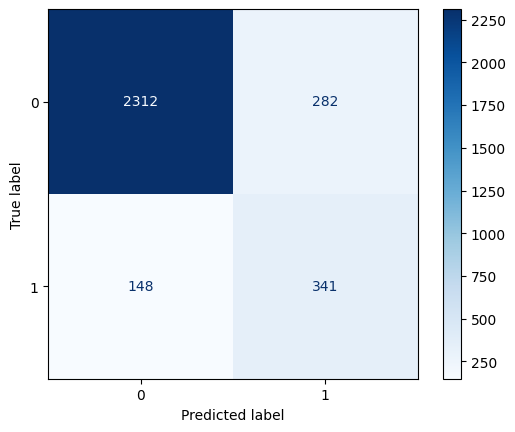

In [50]:
cm = confusion_matrix(y_test, y_pred_new_svm_tres)

disp = ConfusionMatrixDisplay(cm, display_labels = ['0', '1'])
disp.plot(cmap = 'Blues')
plt.show()

## Random Forests


Random forest is made by ensembling decision trees, let's train or random forest algorith to our train data:

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state= 42)

forest.fit(X_train_scaled, y_train)

y_prob_forest = forest.predict_proba(X_test_scaled)[:,1]

y_pred_forest = forest.predict(X_test_scaled)

roc_auc_forest = roc_auc_score(y_test, y_prob_forest)
acc_score_forest = accuracy_score(y_test, y_pred_forest)
f1_score_forest = f1_score(y_test, y_pred_forest)


print(f'ROC AUC score: {roc_auc_forest}')
print(f'Accuracy Score: {acc_score_forest}')
print(f'F1 Score: {f1_score_forest}')

ROC AUC score: 0.9188866709868455
Accuracy Score: 0.8968537139150179
F1 Score: 0.6187050359712231


In [53]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

The average precision score is pretty good compare to other models! One of the major advantage og random forests is that we don't have to worry so much about hyperparameter tuning. Based on the documentation of Random Forest in Scikit-Learn the most important parameters are number of trees (n_estimators) and number of features considered for splitting each leaf node(max_features). However let's try to adjusting all the hyperparameters, as right now we have a large hyperparameter space !

In [55]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': randint(100,500), #number of trees in random forest
    'max_features': ['log2', 'sqrt'], 
    'max_depth': [None, 10, 20, 30], #maximum number of levels in tree
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5), 
    'bootstrap': [True, False] 
}

#Perform RandomizedSearchCV 
random_search = RandomizedSearchCV(estimator = forest,
                                   param_distributions= param_distributions, 
                                   n_iter = 100, 
                                   cv = 5,
                                   scoring = 'f1', 
                                   random_state= 42)

random_search.fit(X_train_scaled, y_train)
print(random_search.best_params_)

KeyboardInterrupt: 

In [60]:
forest_opt = RandomForestClassifier(random_state= 42, 
                                    bootstrap= False, 
                                    max_depth= None, 
                                    max_features= 'sqrt', 
                                    min_samples_leaf= 1, 
                                    min_samples_split= 5,
                                    n_estimators = 483)

forest_opt.fit(X_train_scaled, y_train)

y_prob_forest_opt = forest_opt.predict_proba(X_test_scaled)[:,1]
y_pred_forest_opt = forest_opt.predict(X_test_scaled)

roc_auc_forest_opt = roc_auc_score(y_test, y_prob_forest_opt)
acc_score_forest_opt= accuracy_score(y_test, y_pred_forest_opt)
f1_score_forest_opt = f1_score(y_test, y_pred_forest_opt)

print(f'ROC AUC score: {roc_auc_forest_opt}')
print(f'Accuracy Score: {acc_score_forest_opt}')
print(f'F1 Score: {f1_score_forest_opt}')

ROC AUC score: 0.9233191902660378
Accuracy Score: 0.8968537139150179
F1 Score: 0.6214285714285714


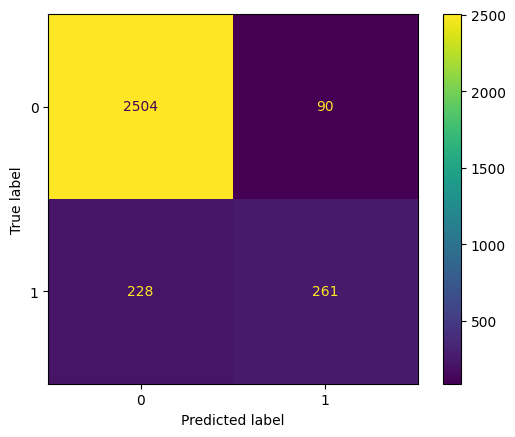

In [58]:
ConfusionMatrixDisplay.from_estimator(forest_opt, X_test_scaled, y_test)

let's try to train our model using smote sampled

In [36]:
forest_smote = RandomForestClassifier(random_state= 42)

forest_smote.fit(X_train_resampled, y_train_resampled)

y_prob_forest_smote = forest_smote.predict_proba(X_test_scaled)[:,1]

y_pred_forest_smote = forest_smote.predict(X_test_scaled)

roc_auc_forest_smote = roc_auc_score(y_test, y_prob_forest_smote)
acc_score_forest_smote = accuracy_score(y_test, y_pred_forest_smote)
f1_score_forest_smote = f1_score(y_test, y_pred_forest_smote)


print(f'ROC AUC score: {roc_auc_forest_smote}')
print(f'Accuracy Score: {acc_score_forest_smote}')
print(f'F1 Score: {f1_score_forest_smote}')

ROC AUC score: 0.9175673608910291
Accuracy Score: 0.8887447291599092
F1 Score: 0.6705091258405379


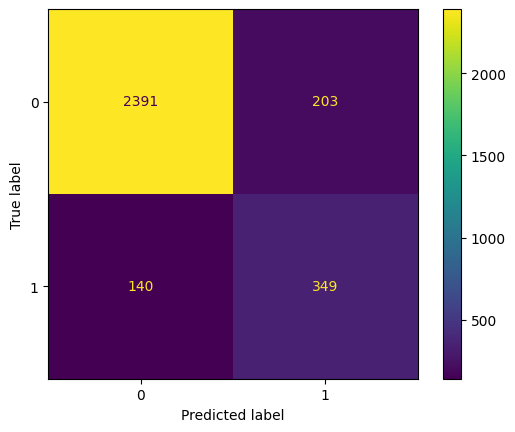

In [63]:
ConfusionMatrixDisplay.from_estimator(forest_smote, X_test_scaled, y_test)

In [155]:
#Perform RandomizedSearchCV 
random_search = RandomizedSearchCV(estimator = forest_smote,
                                   param_distributions= param_distributions, 
                                   n_iter = 100, 
                                   cv = 5,
                                   scoring = 'f1', 
                                   random_state= 42)

random_search.fit(X_train_resampled, y_train_resampled)
print(random_search.best_params_)

{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}


In [62]:
forest_opt_smote = RandomForestClassifier(random_state= 42, 
                                    bootstrap= False, 
                                    max_depth= 30, 
                                    max_features= 'sqrt', 
                                    min_samples_leaf= 1, 
                                    min_samples_split= 2,
                                    n_estimators = 413)

forest_opt_smote.fit(X_train_resampled, y_train_resampled)

y_prob_forest_smote = forest_opt_smote.predict_proba(X_test_scaled)[:,1]
y_pred_forest_smote = forest_opt_smote.predict(X_test_scaled)

roc_auc_forest_smote = roc_auc_score(y_test, y_prob_forest_smote)
acc_score_forest_smote= accuracy_score(y_test, y_pred_forest_smote)
f1_score_forest_smote = f1_score(y_test, y_pred_forest_smote)

print(f'ROC AUC score: {roc_auc_forest_smote}')
print(f'accuracy Score: {acc_score_forest_smote}')
print(f'F1 Score: {f1_score_forest_smote}')

ROC AUC score: 0.9208118309832505
accuracy Score: 0.8897178073305222
F1 Score: 0.6606786427145709


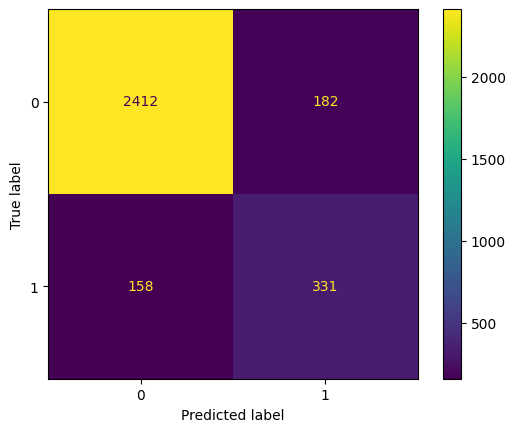

In [158]:
ConfusionMatrixDisplay.from_estimator(forest_opt_smote, X_test_scaled, y_test)

In [71]:
# after tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_forest_smote)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precision[i] != 0 and recall[i] != 0:
        f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

# Find the best threshold
best_threshold_index = np.nanargmax(f1_scores)  # Use np.nanargmax to ignore NaN values
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print('Best Threshold:', best_threshold)
print('Best F1 Score:', best_f1_score)

Best Threshold: 0.4552058111380145
Best F1 Score: 0.6723323890462701


In [75]:
# before tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_forest_smote)

f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = f1_scores[np.argmax(f1_scores)]
print('Best Threshold:', best_threshold)
print('Best F1 Score:', best_f1_score)

Best Threshold: 0.54
Best F1 Score: 0.6746268656716419


#### Best Treshold

In [96]:
# before tuning
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_prob_forest_smote)

f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
best_f1_score_rf = f1_scores_rf[np.argmax(f1_scores_rf)]
print('Best Threshold:', best_threshold_rf)
print('Best F1 Score:', best_f1_score_rf)

Best Threshold: 0.54
Best F1 Score: 0.6746268656716419


we're gonna stick with the previous model before smote and with 0.54 as best treshold

In [77]:
y_pred_new_rf_tres = (y_prob_forest_smote >= best_threshold).astype(int)

f1_score_rf_new = f1_score(y_test, y_pred_new_rf_tres)
acc_score_rf_new = accuracy_score(y_test, y_pred_new_rf_tres)

print(f'RF ROC-AUC SMOTE: {roc_auc_forest_smote}')
print(f'RF f1_score SMOTE: {f1_score_rf_new}')
print(f'RF acc_score SMOTE: {acc_score_rf_new}')


RF ROC-AUC SMOTE: 0.9175673608910291
RF f1_score SMOTE: 0.6746268656716418
RF acc_score SMOTE: 0.8939344794031787


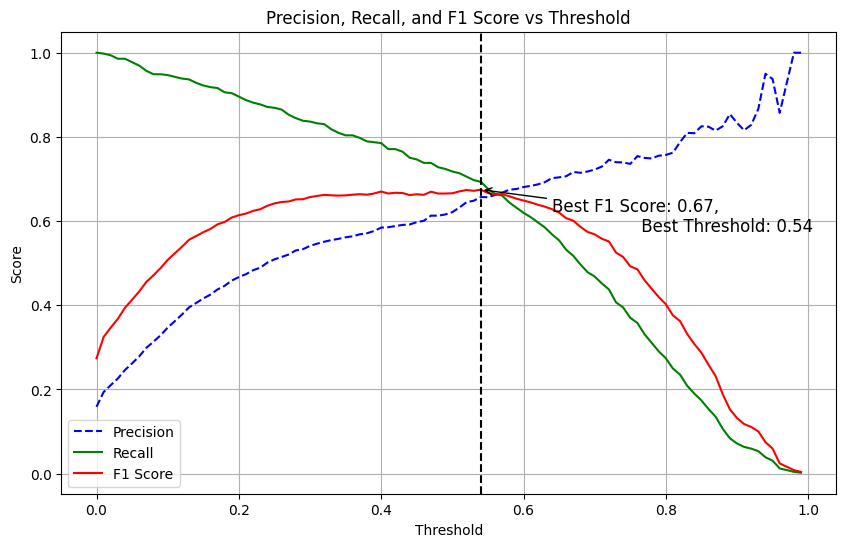

In [78]:
# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend(loc="best")
plt.grid(True)

# Add a vertical line for the best threshold
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Best Threshold ({best_threshold:.2f})')

# Annotate the best F1 score
plt.annotate(f'''Best F1 Score: {best_f1_score:.2f},
                 Best Threshold: {best_threshold:.2f}''',
             xy=(best_threshold, best_f1_score),
             xytext=(best_threshold + 0.1, best_f1_score - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             color='black')

plt.show()

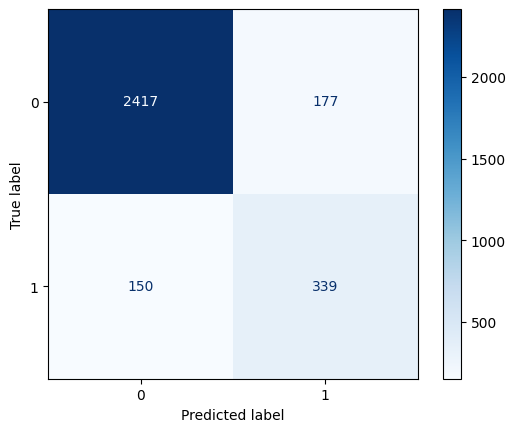

In [79]:
cm = confusion_matrix(y_test, y_pred_new_rf_tres)

disp = ConfusionMatrixDisplay(cm, display_labels = ['0', '1'])
disp.plot(cmap = 'Blues')
plt.show()

## Ensamble method

To use xgboost we need to manually convert input data(x train and y train) into DMatrix format.

Compare to other models withot tuning, xgb already have a good score ! Let's try to optimize the most important parameters for xgboost as xgboost has a lot parameter:

max_depth : levels of the trees, ex: is it a stump

learning_rate : eta 

gamma : parameter that encourages pruning, 

reg_lambda : regularization method 



In [19]:
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

xgb_clf1 = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    early_stopping_rounds = 10,
    seed=42,
)

xgb_clf1.fit(
    X_train_scaled, y_train,
    eval_set= eval_set,
    verbose=True
)


best_iteration = xgb_clf1.best_iteration
print(f'best iteration: {best_iteration}')

[0]	validation_0-aucpr:0.74777	validation_1-aucpr:0.69923
[1]	validation_0-aucpr:0.78782	validation_1-aucpr:0.72749
[2]	validation_0-aucpr:0.80746	validation_1-aucpr:0.73986
[3]	validation_0-aucpr:0.81541	validation_1-aucpr:0.74550
[4]	validation_0-aucpr:0.82434	validation_1-aucpr:0.74994
[5]	validation_0-aucpr:0.83414	validation_1-aucpr:0.75425
[6]	validation_0-aucpr:0.83646	validation_1-aucpr:0.75414
[7]	validation_0-aucpr:0.83987	validation_1-aucpr:0.75531
[8]	validation_0-aucpr:0.84386	validation_1-aucpr:0.75522
[9]	validation_0-aucpr:0.84915	validation_1-aucpr:0.75349
[10]	validation_0-aucpr:0.85547	validation_1-aucpr:0.75159
[11]	validation_0-aucpr:0.85905	validation_1-aucpr:0.75176
[12]	validation_0-aucpr:0.86286	validation_1-aucpr:0.75112
[13]	validation_0-aucpr:0.86526	validation_1-aucpr:0.75249
[14]	validation_0-aucpr:0.86779	validation_1-aucpr:0.75219
[15]	validation_0-aucpr:0.87054	validation_1-aucpr:0.75189
[16]	validation_0-aucpr:0.87339	validation_1-aucpr:0.75239
best it

In [20]:
y_pred_xgb = xgb_clf1.predict(X_test_scaled)
y_prob_xgb = xgb_clf1.predict_proba(X_test_scaled)[:,1]

xgb_auc_score = roc_auc_score(y_test, y_prob_xgb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)
xgb_acc_score = accuracy_score(y_test, y_pred_xgb)

print(f'xgb_auc_score: {xgb_auc_score}')
print(f'xgb_f1_score: {xgb_f1_score}')
print(f'xgb_acc_score: {xgb_acc_score}')

xgb_auc_score: 0.9293741416797927
xgb_f1_score: 0.6534883720930232
xgb_acc_score: 0.9033409017191047


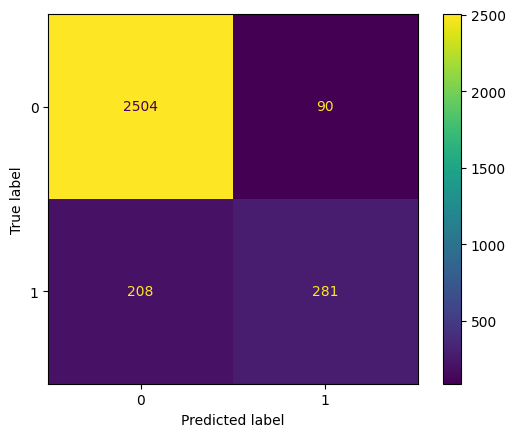

In [21]:
ConfusionMatrixDisplay.from_estimator(xgb_clf1,X_test_scaled,y_test)

In [ ]:
#round 1
#param_grid = {
#    'max_depth': [3,4,5],
#    'learning_rate': [0.1, 0.01, 0.05, 0.5 ,1], 
#    'gamma': [0, 0.25, 1.0],
#    'reg_lambda': [0, 1.0, 10.0, 20, 100],
#    'scale_pos_weight': [1,3, 5]
#}

#round 1
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.01, 0.05, 0.5 ,1], 
    'gamma': [0, 0.01 , 0.1, 0.25, 1.0],
    'reg_lambda': [ 1.0,2,3],
    'scale_pos_weight': [3]
}

#output gamma: 0, learning rate:0.1, max_depth: 4, reg_lambda: 1.0, scale post_weight:3
optimal_params = GridSearchCV(
    estimator= xgb.XGBClassifier(
        objective = 'binary:logistic' ,
        seed = 42, 
        subsample =0.9, 
        colsample_bytree = 0.5), 
        param_grid= param_grid, 
        scoring= 'roc_auc' ,
        verbose = 0, 
        n_jobs = 10, 
        cv = 5)

optimal_params.fit(X_train_scaled, y_train)

print("Best parameters:", optimal_params.best_params_)

In [23]:
#building new model 
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

xgb_clf1 = xgb.XGBClassifier(
    objective='binary:logistic',
    gamma = 0, 
    learning_rate =0.1,
    max_depth = 4, 
    reg_lambda = 1, 
    scale_pos_weight = 3,
    eval_metric='aucpr',
    early_stopping_rounds = 10,
    seed=42,
)

xgb_clf1.fit(
    X_train_scaled, y_train,
    eval_set= eval_set,
    verbose=True
)


best_iteration = xgb_clf1.best_iteration
print(f'best iteration: {best_iteration}')

[0]	validation_0-aucpr:0.72224	validation_1-aucpr:0.70594
[1]	validation_0-aucpr:0.72796	validation_1-aucpr:0.70715
[2]	validation_0-aucpr:0.73376	validation_1-aucpr:0.71872
[3]	validation_0-aucpr:0.73421	validation_1-aucpr:0.71994
[4]	validation_0-aucpr:0.75576	validation_1-aucpr:0.73405
[5]	validation_0-aucpr:0.75589	validation_1-aucpr:0.73406
[6]	validation_0-aucpr:0.76000	validation_1-aucpr:0.73463
[7]	validation_0-aucpr:0.76026	validation_1-aucpr:0.73692
[8]	validation_0-aucpr:0.76137	validation_1-aucpr:0.73692
[9]	validation_0-aucpr:0.76187	validation_1-aucpr:0.73811
[10]	validation_0-aucpr:0.76436	validation_1-aucpr:0.73765
[11]	validation_0-aucpr:0.76596	validation_1-aucpr:0.73953
[12]	validation_0-aucpr:0.76794	validation_1-aucpr:0.74025
[13]	validation_0-aucpr:0.76875	validation_1-aucpr:0.74022
[14]	validation_0-aucpr:0.77015	validation_1-aucpr:0.74414
[15]	validation_0-aucpr:0.77409	validation_1-aucpr:0.74663
[16]	validation_0-aucpr:0.77435	validation_1-aucpr:0.74717
[17]	va

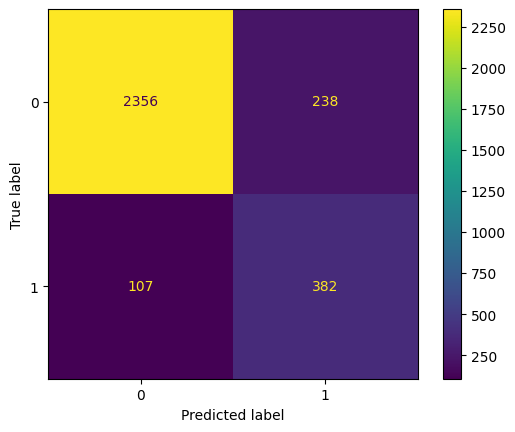

In [24]:
ConfusionMatrixDisplay.from_estimator(xgb_clf1,X_test_scaled,y_test)

In [25]:
y_pred_clsf_opt = xgb_clf1.predict(X_test_scaled)
y_prob_clsf_opt = xgb_clf1.predict_proba(X_test_scaled)[:,1]

In [26]:
roc_auc_xgb = roc_auc_score(y_test, y_prob_clsf_opt)
acc_score_xgb = accuracy_score(y_test, y_pred_clsf_opt)
f1_score_xgb = f1_score(y_test, y_pred_clsf_opt)

print(f'ROC AUC score: {roc_auc_xgb}')
print(f'accuracy Score: {acc_score_xgb}')
print(f'F1 Score: {f1_score_xgb}')

ROC AUC score: 0.9321593956795058
accuracy Score: 0.8880960103795005
F1 Score: 0.6889089269612263


#### SMOTE 

In [27]:
eval_set = [(X_train_resampled, y_train_resampled), (X_test_scaled, y_test)]

xgb_clf_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    early_stopping_rounds = 10,
    seed=42,
)

xgb_clf_smote.fit(
    X_train_resampled, y_train_resampled,
    eval_set= eval_set,
    verbose=True
)


best_iteration = xgb_clf_smote.best_iteration
print(f'best iteration: {best_iteration}')

[0]	validation_0-aucpr:0.95095	validation_1-aucpr:0.67734
[1]	validation_0-aucpr:0.96259	validation_1-aucpr:0.70828
[2]	validation_0-aucpr:0.96707	validation_1-aucpr:0.71192
[3]	validation_0-aucpr:0.96883	validation_1-aucpr:0.71130
[4]	validation_0-aucpr:0.97211	validation_1-aucpr:0.71715
[5]	validation_0-aucpr:0.97828	validation_1-aucpr:0.72590
[6]	validation_0-aucpr:0.97899	validation_1-aucpr:0.72539
[7]	validation_0-aucpr:0.98039	validation_1-aucpr:0.72431
[8]	validation_0-aucpr:0.98212	validation_1-aucpr:0.72565
[9]	validation_0-aucpr:0.98286	validation_1-aucpr:0.72310
[10]	validation_0-aucpr:0.98463	validation_1-aucpr:0.73019
[11]	validation_0-aucpr:0.98550	validation_1-aucpr:0.73008
[12]	validation_0-aucpr:0.98638	validation_1-aucpr:0.73347
[13]	validation_0-aucpr:0.98817	validation_1-aucpr:0.73484
[14]	validation_0-aucpr:0.98861	validation_1-aucpr:0.73717
[15]	validation_0-aucpr:0.98901	validation_1-aucpr:0.73512
[16]	validation_0-aucpr:0.98963	validation_1-aucpr:0.73479
[17]	va

In [108]:
y_pred_xgb = xgb_clf_smote.predict(X_test_scaled)
y_prob_xgb = xgb_clf_smote.predict_proba(X_test_scaled)[:,1]

xgb_auc_score = roc_auc_score(y_test, y_prob_xgb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)
xgb_acc_score = accuracy_score(y_test, y_pred_xgb)

print(f'xgb_auc_score: {xgb_auc_score}')
print(f'xgb_f1_score: {xgb_f1_score}')
print(f'xgb_acc_score: {xgb_acc_score}')

xgb_auc_score: 0.9305795346505148
xgb_f1_score: 0.666043030869972
xgb_acc_score: 0.8842036976970483


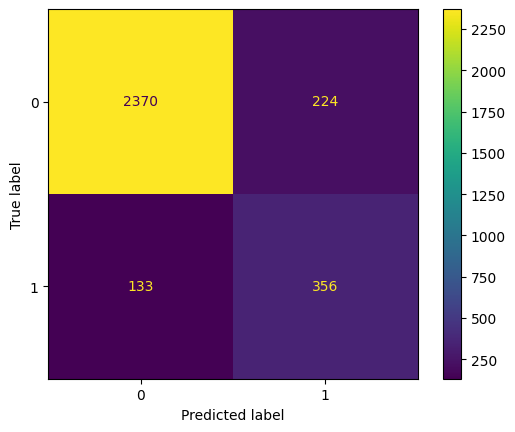

In [109]:
ConfusionMatrixDisplay.from_estimator(xgb_clf_smote,X_test_scaled,y_test)

In [110]:
# let's try to optimize 

#round 1
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.01, 0.05, 0.5 ,1], 
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 20, 100],
    'scale_pos_weight': [1,3, 5]
}


optimal_params = GridSearchCV(
    estimator= xgb.XGBClassifier(
        objective = 'binary:logistic' ,
        seed = 42, 
        subsample =0.9, 
        colsample_bytree = 0.5), 
        param_grid= param_grid, 
        scoring= 'roc_auc' ,
        verbose = 0, 
        n_jobs = 10, 
        cv = 5)

optimal_params.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", optimal_params.best_params_)

Best parameters: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [116]:
#round 2
param_grid = {
    'max_depth': [7,8,9],
    'learning_rate': [0.5], 
    'gamma': [0, 0.05],
    'reg_lambda': [10],
    'scale_pos_weight': [1]
}

optimal_params = GridSearchCV(
    estimator= xgb.XGBClassifier(
        objective = 'binary:logistic' ,
        seed = 42, 
        subsample =0.9, 
        colsample_bytree = 0.5), 
        param_grid= param_grid, 
        scoring= 'roc_auc' ,
        verbose = 0, 
        n_jobs = 10, 
        cv = 5)

optimal_params.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", optimal_params.best_params_)


Best parameters: {'gamma': 0.05, 'learning_rate': 0.5, 'max_depth': 8, 'reg_lambda': 10, 'scale_pos_weight': 1}


In [117]:
eval_set = [(X_train_resampled, y_train_resampled), (X_test_scaled, y_test)]

xgb_clf_smote_new = xgb.XGBClassifier(
    objective='binary:logistic',
    gamma = 0.05, 
    learning_rate =0.5,
    max_depth = 8, 
    reg_lambda = 10, 
    scale_pos_weight = 1,
    eval_metric='aucpr',
    early_stopping_rounds = 10,
    seed=42,
)

xgb_clf_smote_new.fit(
    X_train_scaled, y_train,
    eval_set= eval_set,
    verbose=True
)


best_iteration = xgb_clf_smote_new.best_iteration
print(f'best iteration: {best_iteration}')

[0]	validation_0-aucpr:0.92736	validation_1-aucpr:0.67598
[1]	validation_0-aucpr:0.94080	validation_1-aucpr:0.70336
[2]	validation_0-aucpr:0.95012	validation_1-aucpr:0.72336
[3]	validation_0-aucpr:0.95419	validation_1-aucpr:0.72810
[4]	validation_0-aucpr:0.95873	validation_1-aucpr:0.72992
[5]	validation_0-aucpr:0.96160	validation_1-aucpr:0.73060
[6]	validation_0-aucpr:0.96393	validation_1-aucpr:0.73232
[7]	validation_0-aucpr:0.96503	validation_1-aucpr:0.73499
[8]	validation_0-aucpr:0.96744	validation_1-aucpr:0.73557
[9]	validation_0-aucpr:0.96855	validation_1-aucpr:0.73466
[10]	validation_0-aucpr:0.96922	validation_1-aucpr:0.73518
[11]	validation_0-aucpr:0.97006	validation_1-aucpr:0.73503
[12]	validation_0-aucpr:0.97138	validation_1-aucpr:0.73499
[13]	validation_0-aucpr:0.97250	validation_1-aucpr:0.73579
[14]	validation_0-aucpr:0.97349	validation_1-aucpr:0.73513
[15]	validation_0-aucpr:0.97418	validation_1-aucpr:0.73486
[16]	validation_0-aucpr:0.97539	validation_1-aucpr:0.73311
[17]	va

In [118]:
y_pred_clsf_smote_nw = xgb_clf_smote_new.predict(X_test_scaled)
y_prob_clsf_smote_nw = xgb_clf_smote_new.predict_proba(X_test_scaled)[:,1]

In [120]:
roc_auc_xgb_smote = roc_auc_score(y_test, y_prob_clsf_smote_nw)
acc_score_xgb_smote = accuracy_score(y_test, y_pred_clsf_smote_nw)
f1_score_xgb_smote = f1_score(y_test, y_pred_clsf_smote_nw)

print(f'ROC AUC score: {roc_auc_xgb_smote}')
print(f'accuracy Score: {acc_score_xgb_smote}')
print(f'F1 Score: {f1_score_xgb_smote}')

ROC AUC score: 0.924470975177892
accuracy Score: 0.8949075575737918
F1 Score: 0.6359550561797753


In [ ]:
y_pred_clsf_opt = xgb_clf1.predict(X_test_scaled)
y_prob_clsf_opt = xgb_clf1.predict_proba(X_test_scaled)[:,1]

#### Best Treshold

In [97]:
precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_test, y_prob_clsf_opt)

f1_scores_xg = 2 * (precision_xg * recall_xg) / (precision_xg + recall_xg)
best_threshold_xg = thresholds_xg[np.argmax(f1_scores_xg)]
best_f1_score_xg = f1_scores_xg[np.argmax(f1_scores_xg)]
print('Best Threshold:', best_threshold_xg)
print('Best F1 Score:', best_f1_score_xg)

Best Threshold: 0.5028816
Best F1 Score: 0.6901535682023486


In [126]:
y_pred_new_xgb_opt = (y_prob_clsf_opt >= best_threshold).astype(int)

f1_score_xgb_opt = f1_score(y_test, y_pred_new_xgb_opt)
acc_score_xgb_opt = accuracy_score(y_test, y_pred_new_xgb_opt)

print(f'RF ROC-AUC SMOTE: {roc_auc_xgb}')
print(f'RF f1_score SMOTE: {f1_score_xgb_opt}')
print(f'RF acc_score SMOTE: {acc_score_xgb_opt}')


RF ROC-AUC SMOTE: 0.9321593956795058
RF f1_score SMOTE: 0.6901535682023487
RF acc_score SMOTE: 0.8887447291599092


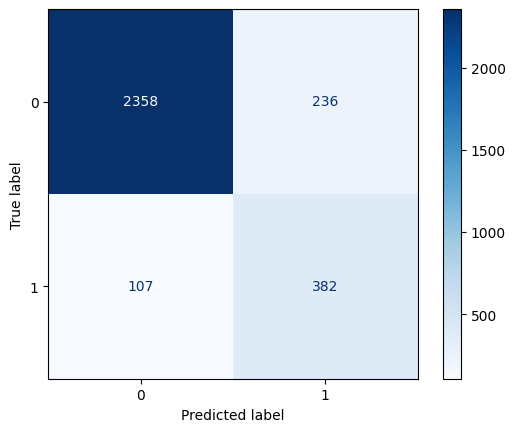

In [127]:
cm = confusion_matrix(y_test, y_pred_new_xgb_opt)

disp = ConfusionMatrixDisplay(cm, display_labels = ['0', '1'])
disp.plot(cmap = 'Blues')
plt.show()

## PR AUC PLOT

In [94]:
import numpy as np

f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
best_threshold_lr = thresholds_lr[np.argmax(f1_scores_lr)]
best_f1_score_lr = f1_scores_lr[np.argmax(f1_scores_lr)]
print('Best Threshold:', best_threshold_lr)
print('Best F1 Score:', best_f1_score_lr)

array([0.27379619, 0.27387286, 0.27394958, ..., 0.00814664, 0.00408163,
       0.        ])

In [ ]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_prob_svm_smote)

f1_scores_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
best_threshold_svm = thresholds_svm[np.argmax(f1_scores_svm)]
best_f1_score_svm = f1_scores_svm[np.argmax(f1_scores_svm)]
print('Best Threshold:', best_threshold_svm)
print('Best F1 Score:', best_f1_score_svm)

In [ ]:
# before tuning
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_prob_forest_smote)

f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_threshold_rf = thresholds_rf[np.argmax(f1_scores_rf)]
best_f1_score_rf = f1_scores_rf[np.argmax(f1_scores_rf)]
print('Best Threshold:', best_threshold_rf)
print('Best F1 Score:', best_f1_score_rf)

In [ ]:
precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_test, y_prob_clsf_opt)

f1_scores_xg = 2 * (precision_xg * recall_xg) / (precision_xg + recall_xg)
best_threshold_xg = thresholds_xg[np.argmax(f1_scores_xg)]
best_f1_score_xg = f1_scores_xg[np.argmax(f1_scores_xg)]
print('Best Threshold:', best_threshold_xg)
print('Best F1 Score:', best_f1_score_xg)

In [112]:
auc_lr = auc(recall_lr, precision_lr)
auc_svm = auc(recall_svm, precision_svm)
auc_rf = auc(recall_rf, precision_rf)
auc_xgb = auc(recall_xg, precision_xg)

In [115]:
positive_ratio = y_test.mean()

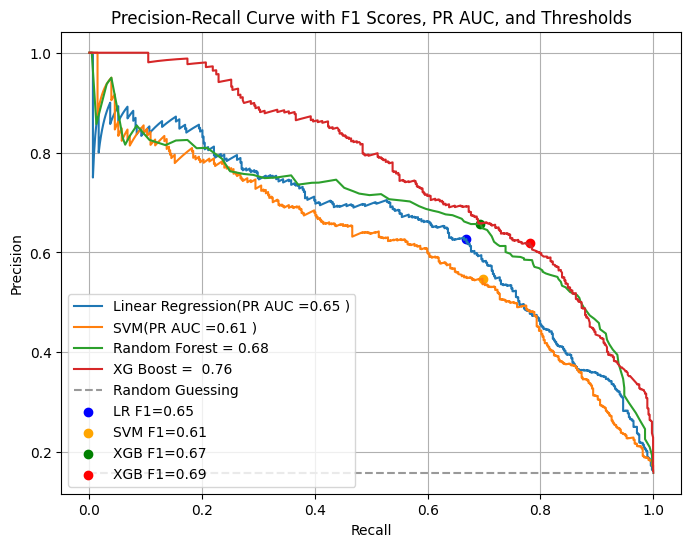

In [116]:
import matplotlib.pyplot as plt

#plot Precission Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall_lr, precision_lr, label = f'Linear Regression(PR AUC ={auc_lr:.2f} )')
plt.plot(recall_svm, precision_svm, label = f'SVM(PR AUC ={auc_svm:.2f} )')
plt.plot(recall_rf, precision_rf, label = f'Random Forest ={auc_rf: .2f}')
plt.plot(recall_xg, precision_xg, label = f'XG Boost = {auc_xgb: .2f}')

#plot random guessing
plt.plot([0,1], 
         [positive_ratio,positive_ratio], 
         linestyle = '--', 
         color = (0.6,0.6,0.6), 
         label = 'Random Guessing')

plt.scatter(recall_lr[np.argmax(f1_scores_lr)], precision_lr[np.argmax(f1_scores_lr)], marker='o', color='blue', label=f'LR F1={max(f1_scores_lr):.2f}')
plt.scatter(recall_svm[np.argmax(f1_scores_svm)], precision_svm[np.argmax(f1_scores_svm)], marker='o', color='orange', label=f'SVM F1={max(f1_scores_svm):.2f}')
plt.scatter(recall_rf[np.argmax(f1_scores_rf)], precision_rf[np.argmax(f1_scores_rf)], marker='o', color='green', label=f'XGB F1={max(f1_scores_rf):.2f}')
plt.scatter(recall_xg[np.argmax(f1_scores_xg)], precision_xg[np.argmax(f1_scores_xg)], marker='o', color='red', label=f'XGB F1={max(f1_scores_xg):.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with F1 Scores, PR AUC, and Thresholds')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing XGBoost 

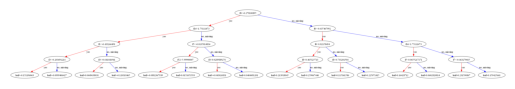

In [29]:
from xgboost import plot_tree


plot_tree(xgb_clf1, num_trees=0)
plt.show()

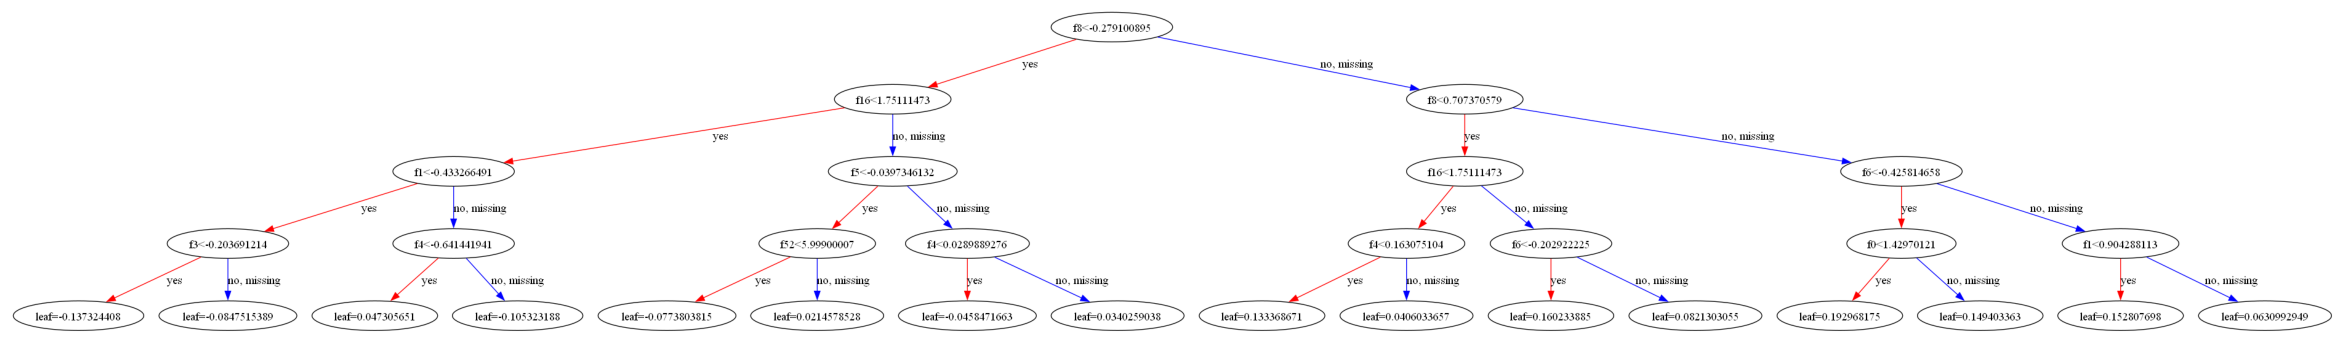

In [36]:
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost import plot_tree


fig, ax = plt.subplots(figsize=(30, 30))  # Increase figure size
plot_tree(xgb_clf1, num_trees=2, ax= ax)
plt.show()